<a href="https://colab.research.google.com/github/rafaels100/TP1_Pandas_LaboDatos_UBA/blob/main/TP1_DescripcionBaseDatosMundialesFutbol_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import os

drive.mount("/content/drive")

filename = '/content/drive/My Drive/PrimeraEjercitacion/WorldCupMatches.csv'

df = pd.read_csv(filename)

Mounted at /content/drive


EJ 1 : Construir un ranking de los mundiales por cantidad de goles anotados en promedio por partido (por ejemplo, en una lista).

Creo un objeto series que contenga a todos los años, y luego aplico value_counts para obtener todos los años que hay y sus apariciones. Me quedo con todos los años que hay.

In [ ]:
años_mundiales = df["Year"].value_counts().index

Calculo el promedio de goles por año, iterando por todos los años en los que ocurrio el mundial, y quedandome con las columnas 6 y 8 correspondientes a los goles locales y visitantes. Sumo las columnas y calculo el promedio de goles totales para cada año.

In [ ]:
promedios_goles = [df[df["Year"] == año].iloc[0:, 6:8].sum(axis=1).mean() for año in años_mundiales]

Uno los promedios con los respectivos años en tuplas

In [ ]:
mundiales_prom = zip(promedios_goles, años_mundiales)

Ordeno la lista de tuplas de mayor a menor para obtener el ranking de promedios de goles por año

In [ ]:
ranking_prom = sorted(mundiales_prom, reverse=True)
print("RTA Ej 1")
print(ranking_prom)

RTA Ej 1
[(5.384615384615385, 1954.0), (4.666666666666667, 1938.0), (4.117647058823529, 1934.0), (4.0, 1950.0), (3.888888888888889, 1930.0), (3.6, 1958.0), (2.96875, 1970.0), (2.8076923076923075, 1982.0), (2.78125, 1966.0), (2.78125, 1962.0), (2.7115384615384617, 1994.0), (2.6842105263157894, 1978.0), (2.671875, 1998.0), (2.575, 2014.0), (2.5526315789473686, 1974.0), (2.5384615384615383, 1986.0), (2.515625, 2002.0), (2.296875, 2006.0), (2.265625, 2010.0), (2.2115384615384617, 1990.0)]


EJ 1.2 : Hacer un gráfico de barras donde en el eje Y figura la cantidad promedio de goles y en el X aparecen los mundiales, ordenados de izquierda a derecha en cantidad decreciente de goles.

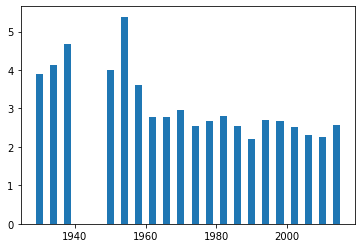

In [ ]:
plt.bar(años_mundiales, promedios_goles, width=2)
plt.show()

EJ 2 : Construir un ranking de los paises que mas partidos ganaron por penales.
Representarlo en un grafico igual que en la consigna anterior.

ganador : busca por la palabra "win" y corta desde el principio de la string hasta donde la encuentra, -1. De esa forma me quedo con el pais ganador del partido.

In [ ]:
def ganador(x):
    if type(x) == str:
        x = x[0 : x.find("win")-1]
        return x
    else:
        return x

Creo una Series de penales, que contendra a todos los partidos que se decidieron por penales

In [ ]:
por_penales = df[df["Win conditions"].str.contains("penal")==True].loc[:, "Win conditions"]

Me quedo solo con el nombre de los paises ganadores, utilizando la funcion ganador

In [ ]:
por_pen_win = por_penales.apply(lambda x : ganador(x))
print(por_pen_win)

357                       
404                 France
405             Germany FR
406                Belgium
452    Republic of Ireland
456                       
460                       
461                       
507               Bulgaria
511                 Sweden
515                 Brazil
571              Argentina
572                 France
576                 Brazil
630                  Spain
639         Korea Republic
697                Ukraine
700                Germany
702               Portugal
707                  Italy
762               Paraguay
765                Uruguay
820                 Brazil
829              Argentina
830            Netherlands
833             Costa Rica
836                 Brazil
839             Costa Rica
847            Netherlands
849              Argentina
Name: Win conditions, dtype: object


Vemos que hay valores que quedaron en blanco, porque alguien se olvido de
completar quien fue el equipo ganador por penales de dicho partido.
Dropeamos dichas filas.
Para ello recurro al hecho de que una string vacia "" en bool es considerada
False. Entonces, hago strip en todas las string que modifique previamente.
Si una de ellas quedo vacia o con blanks " ", se va a poner vacia ahora "".
Procedo a eliminarlas por tipo. Si es False, no sobrevive:

In [ ]:
por_pen_win_clean = por_pen_win[por_pen_win.str.strip().astype(bool)]
print(por_pen_win_clean)

404                 France
405             Germany FR
406                Belgium
452    Republic of Ireland
507               Bulgaria
511                 Sweden
515                 Brazil
571              Argentina
572                 France
576                 Brazil
630                  Spain
639         Korea Republic
697                Ukraine
700                Germany
702               Portugal
707                  Italy
762               Paraguay
765                Uruguay
820                 Brazil
829              Argentina
830            Netherlands
833             Costa Rica
836                 Brazil
839             Costa Rica
847            Netherlands
849              Argentina
Name: Win conditions, dtype: object


El ranking de paises que mas ganaron por penales queda capturado en este series

In [ ]:
ranking_pen_win = por_pen_win_clean.value_counts()
print("RTA Ej 2")
print(ranking_pen_win)

RTA Ej 2
Brazil                 4
Argentina              3
France                 2
Netherlands            2
Costa Rica             2
Sweden                 1
Bulgaria               1
Republic of Ireland    1
Spain                  1
Germany FR             1
Ukraine                1
Germany                1
Portugal               1
Italy                  1
Paraguay               1
Uruguay                1
Belgium                1
Korea Republic         1
Name: Win conditions, dtype: int64


Separo a los paises y los goles anotados para poder graficar

In [ ]:
paises_pen = ranking_pen_win.index
penales_cant = ranking_pen_win.values

Ploteo

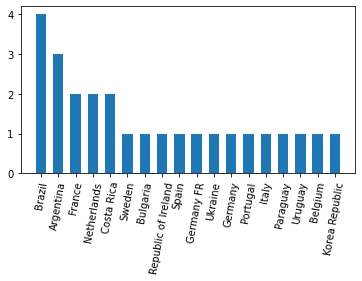

In [ ]:
plt.xticks(rotation=80)
plt.subplots_adjust(bottom=.3)
plt.bar(paises_pen, penales_cant, width = .6)
plt.show()

EJ 3 : Quien fue el arquero que mas partidos gano por penales ?

In [ ]:
filename = '/content/drive/My Drive/PrimeraEjercitacion/WorldCupPlayers.csv'
df1 = pd.read_csv(filename)

APPROACH:
1: Creo el df de partidos ganados por penales, con sus respectivos ganadores
(ej 2), pero con el matchID incluido.
2: Mergeo la lista de jugadores con la lista del paso 1, por MatchID.
De esa manera obtengo un df con todos los jugadores que participaron en
esos partidos que se decidieron por penales.
3: Filtro por los jugadores que sean GK, asi me quedo solo con los arqueros
que estuvieron presentes en esos partidos que se decidieron por penales.
4: Me quedo con los jugadores que su nacionalidad "Team Initials" este incluida
en la columna del equipo ganador. Asi sabre que ese arquero no solo
participo en ese partido, sino que tambien gano el partido.
5: Hago una value count para ver en cuantos partidos que ganaron por penales
estuvo presente cada arquero.

1: Creo una dataframe de penales, que contendra a todos los partidos que se decidieron por penales y su MatchID

In [ ]:
df_penales = df[df["Win conditions"].str.contains("penal")==True].loc[:, ["Win conditions", "MatchID"]]

Me quedo solo con el nombre de los paises ganadores, utilizando la funcion ganador. Como esta vez no se trata de una Series, sino de un DataFrame, puedo usar el metodo applymap:

In [ ]:
df_pen_win = df_penales.applymap(ganador)
print(df_pen_win)

          Win conditions      MatchID
357                             914.0
404               France        440.0
405           Germany FR        575.0
406              Belgium        421.0
452  Republic of Ireland        248.0
456                              31.0
460                              28.0
461                             159.0
507             Bulgaria       3092.0
511               Sweden       3095.0
515               Brazil       3104.0
571            Argentina       8779.0
572               France       8781.0
576               Brazil       8785.0
630                Spain   43950052.0
639       Korea Republic   43950059.0
697              Ukraine   97410054.0
700              Germany   97410057.0
702             Portugal   97410059.0
707                Italy   97410064.0
762             Paraguay  300061497.0
765              Uruguay  300061508.0
820               Brazil  300186487.0
829            Argentina  300186490.0
830          Netherlands  300186488.0
833         

Limpio los espacios vacios

In [ ]:
df_pen_win_clean = df_pen_win[df_pen_win["Win conditions"].str.strip().astype(bool)]
print(df_pen_win_clean)

          Win conditions      MatchID
404               France        440.0
405           Germany FR        575.0
406              Belgium        421.0
452  Republic of Ireland        248.0
507             Bulgaria       3092.0
511               Sweden       3095.0
515               Brazil       3104.0
571            Argentina       8779.0
572               France       8781.0
576               Brazil       8785.0
630                Spain   43950052.0
639       Korea Republic   43950059.0
697              Ukraine   97410054.0
700              Germany   97410057.0
702             Portugal   97410059.0
707                Italy   97410064.0
762             Paraguay  300061497.0
765              Uruguay  300061508.0
820               Brazil  300186487.0
829            Argentina  300186490.0
830          Netherlands  300186488.0
833           Costa Rica  300186459.0
836               Brazil  300186487.0
839           Costa Rica  300186459.0
847          Netherlands  300186488.0
849         

2: Mergeo por MatchID el dataframe de partidos ganados por penales con el de jugadores con las columnas que me interesan del nuevo dataframe.

In [ ]:
cols = ["MatchID", "Player Name", "Position", "Team Initials"]
df_pen_jug = pd.merge(df_pen_win_clean, df1.loc[:, cols], how="inner", on="MatchID")

3: Filtro por los jugadores que sean goalkeeepers, asi me quedo solo con los arqueros que estuvieron presentes en esos partidos que se decidieron por penales

In [ ]:
df_pen_gk = df_pen_jug[df_pen_jug["Position"] == "GK"]
print(df_pen_gk)

     Win conditions      MatchID         Player Name Position Team Initials
0            France        440.0              CARLOS       GK           BRA
1            France        440.0           Joel BATS       GK           FRA
44       Germany FR        575.0   Harald SCHUMACHER       GK           FRG
45       Germany FR        575.0        Pablo LARIOS       GK           MEX
88          Belgium        421.0  Andoni ZUBIZARRETA       GK           ESP
...             ...          ...                 ...      ...           ...
1499     Costa Rica  300186459.0            KARNEZIS       GK           GRE
1520     Costa Rica  300186459.0        PEMBERTON P.       GK           CRC
1521     Costa Rica  300186459.0              GLYKOS       GK           GRE
1522     Costa Rica  300186459.0       CAMBRONERO D.       GK           CRC
1523     Costa Rica  300186459.0              KAPINO       GK           GRE

[137 rows x 5 columns]


4: Me quedo con los jugadores que su nacionalidad "Team Initials" este incluida en la columna del equipo ganador. Asi sabre que ese arquero no solo participo en ese partido, sino que tambien gano el partido.

In [ ]:
df_pen_gk_win2 = df_pen_gk[df_pen_gk.apply(lambda x : x["Team Initials"].lower() in x["Win conditions"].lower(), axis=1)]
print(df_pen_gk_win2)

      Win conditions      MatchID       Player Name Position Team Initials
1             France        440.0         Joel BATS       GK           FRA
89           Belgium        421.0  Jean Marie PFAFF       GK           BEL
221           Sweden       3095.0    Thomas RAVELLI       GK           SWE
264           Brazil       3104.0          TAFFAREL       GK           BRA
308        Argentina       8779.0        Carlos ROA       GK           ARG
353           France       8781.0    Fabien BARTHEZ       GK           FRA
396           Brazil       8785.0          TAFFAREL       GK           BRA
487   Korea Republic   43950059.0           W J LEE       GK           KOR
533          Ukraine   97410054.0       SHOVKOVSKYI       GK           UKR
555          Ukraine   97410054.0            PYATOV       GK           UKR
557          Ukraine   97410054.0             SHUST       GK           UKR
578          Germany   97410057.0           LEHMANN       GK           GER
625         Portugal   97

5: Hago una value count para ver en cuantos partidos que ganaron por penales estuvo presente cada arquero. El ranking de arqueros que mas partidos ganaron por penales queda capturado en el siguiente series:

In [ ]:
ranking_gk_pen = df_pen_gk_win2["Player Name"].value_counts()
print(ranking_gk_pen)

ANDUJAR             4
ORION               4
ROMERO              4
VICTOR              4
JEFFERSON           4
JULIO CESAR         4
TAFFAREL            2
D. BARRETO          1
SILVA               1
CASTILLO            1
MUSLERA             1
BOBADILLA           1
Joel BATS           1
Jean Marie PFAFF    1
RICARDO             1
LEHMANN             1
SHUST               1
PYATOV              1
SHOVKOVSKYI         1
W J LEE             1
Fabien BARTHEZ      1
Carlos ROA          1
Thomas RAVELLI      1
BUFFON              1
Name: Player Name, dtype: int64


Vemos que hay un empate entre los arqueros mas ganadores por penales:

In [ ]:
mas_ganadores = ranking_gk_pen[ranking_gk_pen.values == 4]
print("RTA Ej 3")
print("Hay un empate entre los arqueros")
print(mas_ganadores)

RTA Ej 3
Hay un empate entre los arqueros
ANDUJAR        4
ORION          4
ROMERO         4
VICTOR         4
JEFFERSON      4
JULIO CESAR    4
Name: Player Name, dtype: int64


EJ 4 : Construir un histograma que muestra como están distribuidos los goles a lo largo de la duración de un partido. Es decir, armar un gráfico que divida
los '90 minutos de un partido en bines de 4 minutos en el eje X, y que tenga
en el eje Y la cantidad total de goles anotados en el bin correspondiente.

obtener_minutos : Esta funcion convierte las strings de los eventos en listas con los goles que me interesan (aquellos con G, P o W).

In [ ]:
def obtener_minutos(x):
    buscando = ["G", "P", "W"]
    no_buscando = ["H", "M"]
    minutos_goles = []
    if type(x) == str:
        #hago split sobre la string para separarla en una lista segun sus
        #espacios vacios
        for item in x.split(" "):
            #chequeo si la string spliteada tiene la letra deseada y no tiene la indeseada
            if any(x in item for x in buscando) and not any(x in item for x in no_buscando):
                #sliceo el string para quedarme con el numero y hago int()
                minuto = int(item[1:-1])
                #añado el minuto como entero a la lista de minutos de goles
                minutos_goles.append(minuto)
        return minutos_goles
    else:
        return x

Creo el dataframe que contiene los eventos que me interesan, es decir, aquellos
con las letras G, P o W. Para ello utilizo una regex expression que utiliza el OR (|). Si bien obtengo algunos eventos no deseados, por
ejemplo los que tienen GH o PM, luego me encargo de ellos en la funcion de
obtener minutos

In [ ]:
df_eventos = df1[df1["Event"].str.contains("G|P|W")==True].loc[:, "Event"]
print(df_eventos)

2                  G40'
3                  G70'
6             G43' G87'
14                 G19'
35                 G45'
              ...      
37631    I58' G69' G79'
37701         G17' O70'
37705               P3'
37713              G90'
37778        I88' G113'
Name: Event, Length: 2071, dtype: object


Convierto las strings de minutos en listas con integers que contienen
solo los minutos en que se realizaron los goles (G, P, W)

In [ ]:
df_minutos_goles = df_eventos.apply(lambda x : obtener_minutos(x))
print(df_minutos_goles)

2            [40]
3            [70]
6        [43, 87]
14           [19]
35           [45]
           ...   
37631    [69, 79]
37701        [17]
37705         [3]
37713        [90]
37778       [113]
Name: Event, Length: 2071, dtype: object


Convierto el dataframe con las listas de minutos en una lista simple
para poder graficarlo

In [ ]:
minutos_goles = [item for sublist in df_minutos_goles for item in sublist]

Grafico el histograma

RTA Ej 4


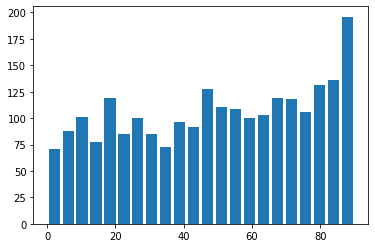

In [ ]:
print("RTA Ej 4")
plt.hist(minutos_goles, bins = int(90/4), range=[0, 90], rwidth=0.8)
plt.show()

EJ 5
Hacerlo por separado para la fase de grupos y para la fase de eliminación
(todos los partidos posteriores a la fase de grupos).

FASE DE GRUPOS: La palabra clave a buscar en la fase de grupos es Group. Me quedo con los MatchID de los partidos de fase de grupos

In [ ]:
df_grupos = df[df["Stage"].str.contains("Group")==True].loc[:, "MatchID"]

Matcheo los eventos del dataframe de jugadores con estos matchID, pues
asi obtendre un df de los eventos ocurridos en los partidos de
fase de grupos

In [ ]:
df_jug_grupos = pd.merge(df1.loc[:, ["MatchID", "Event"]], df_grupos)

dropeo los NaN

In [ ]:
df_jug_grupos.dropna(inplace=True)
print(df_jug_grupos)

         MatchID      Event
2           1096       G40'
3           1096       G70'
6           1096  G43' G87'
14          1096       G19'
35          1090       G45'
...          ...        ...
27574  300186506      IH46'
27575  300186506  I77' Y87'
27576  300186506       I67'
27577  300186506       I90'
27579  300186506       Y90'

[6600 rows x 2 columns]


Utilizo ahora la funcion obtener minutos para parsear los minutos de la columna Event. Las filas con eventos que no son los buscados (no son G, P, W) apareceran como listas vacias, cosa que no interfiere con calculos futuros.

In [ ]:
df_min_gol_grup = df_jug_grupos["Event"].apply(lambda x : obtener_minutos(x))
print(df_min_gol_grup)

2            [40]
3            [70]
6        [43, 87]
14           [19]
35           [45]
           ...   
27574          []
27575          []
27576          []
27577          []
27579          []
Name: Event, Length: 6600, dtype: object


Vemos que hubo varios partidos en la fase de grupos en donde no hubo goles.
convierto a la series de listas con los minutos en una lista comun para
poder graficar el histograma

In [ ]:
minutos_goles_grup = [item for sublist in df_min_gol_grup for item in sublist]

Ploteo

RTA Ej 5:


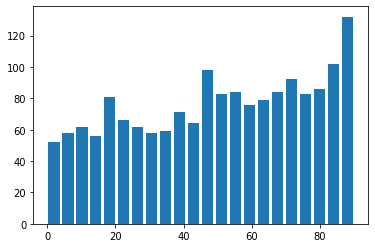

In [ ]:
print("RTA Ej 5:")
plt.hist(minutos_goles_grup, bins = int(90/4), range=[0, 90], rwidth=0.8)
plt.show()

La tendencia de muchos goles al final del partido se sostiene

ELIMINATORIAS : Creo una lista con las palabras clave que hacen referencia a las eliminatorias

In [ ]:
key_word_elimi = ["Final", "final", "Round", "round", "Place", "place"]

Dropeo los NaN del dataframe original de partidos, creando uno nuevo

In [ ]:
df2 = df.dropna()

Busco por las palabras clave que indican partido de eliminatoria, y me quedo con los matchID correspondientes a los partidos de eliminatorias

In [ ]:
df_eliminatorias = df2[df2["Stage"].apply(lambda x : any(pal in x for pal in key_word_elimi) if type(x) == str else x)].loc[:, "MatchID"]

Matcheo los eventos del dataframe de jugadores con estos matchID, pues asi obtendre un df de los eventos ocurridos en los partidos de eliminatorias

In [ ]:
df_jug_elimi = pd.merge(df1.loc[:, ["MatchID", "Event"]], df_eliminatorias)
print(df_jug_elimi)

         MatchID Event
0           1088   NaN
1           1088   NaN
2           1088   NaN
3           1088   NaN
4           1088   NaN
...          ...   ...
11480  300186497  I72'
11481  300186497   NaN
11482  300186497   NaN
11483  300186497   NaN
11484  300186497   NaN

[11485 rows x 2 columns]


dropeo los NaN

In [ ]:
df_jug_elimi.dropna(inplace=True)
print(df_jug_elimi)

         MatchID        Event
6           1088         G56'
8           1088    G69' G87'
10          1088         G20'
12          1088    G80' G85'
21          1088         G89'
...          ...          ...
11470  300186497        I111'
11471  300186497  I105' G107'
11472  300186497  I105' G107'
11479  300186497         I72'
11480  300186497         I72'

[2905 rows x 2 columns]


Utilizo ahora la funcion obtener minutos para parsear los minutos de la columna Event. Las filas con eventos que no son los buscados (no son G, P, W) apareceran como listas vacias, cosa que no interfiere con calculos futuros

In [ ]:
df_min_gol_elimi = df_jug_elimi["Event"].apply(lambda x : obtener_minutos(x))
print(df_min_gol_elimi)

6            [56]
8        [69, 87]
10           [20]
12       [80, 85]
21           [89]
           ...   
11470          []
11471       [107]
11472       [107]
11479          []
11480          []
Name: Event, Length: 2905, dtype: object


Convierto a la series de listas con los minutos en una lista comun para poder graficar el histograma

In [ ]:
minutos_goles_elimi = [item for sublist in df_min_gol_elimi for item in sublist]

Ploteo

RTA Ej 5


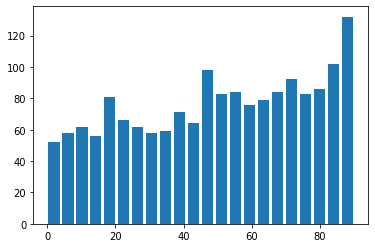

In [ ]:
print("RTA Ej 5")
plt.hist(minutos_goles_grup, bins = int(90/4), range=[0, 90], rwidth=0.8)
plt.show()

La tendencia de muchos goles al final del partido se sostiene

EJ 6 : Para los partidos en que hubo al menos algun gol, obtener el tiempo hasta el obtener el tiempo que transcurrió hasta el primer gol. h Hacer un histograma de la distribución de estos valores.

Voy a trabajar con el dataframe que tiene a los minutos en que ocurrieron los goles como listas en su columna (df_minutos_goles, ejercicio 4). Busco por filas que contengan una lista al menos de largo 1. Eso significa que en ese partido se anoto al menos un gol.

In [ ]:
df_min_alMenos1 = df_minutos_goles[df_minutos_goles.apply(lambda x : len(x)>0)]
print(df_min_alMenos1)

2            [40]
3            [70]
6        [43, 87]
14           [19]
35           [45]
           ...   
37631    [69, 79]
37701        [17]
37705         [3]
37713        [90]
37778       [113]
Name: Event, Length: 2064, dtype: object


Ahora, me quedo con el primer elemento de la lista, correspondiente al minuto en que se anoto el primer gol

In [ ]:
df_min_gol1 = df_min_alMenos1.apply(lambda x : x[0])

Ploteo

RTA Ej 6


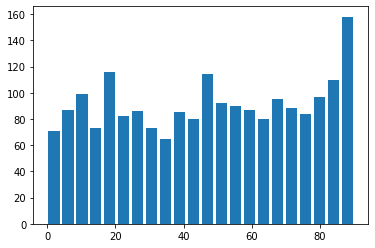

In [ ]:
print("RTA Ej 6")
plt.hist(df_min_gol1, bins = int(90/4), range=[0, 90], rwidth=0.8)
plt.show()

EJ 7 : Para los partidos en los que hubo más de un gol, obtener los tiempos
transcurridos entre goles. Hacer un histograma de la distribución de estos valores.

Voy a trabajar con el dataframe que tiene a los minutos en que ocurrieron los goles como listas en su columna (df_minutos_goles, ejercicio 4). Busco por filas que contengan una lista al menos de largo 2. Eso significa que en ese partido se anotaron al menos dos goles.

In [ ]:
df_min_alMenos2 = df_minutos_goles[df_minutos_goles.apply(lambda x : len(x)>1)]

deltas_t : Funcion que calcula la diferencia de tiempos entre goles, restando el elemento siguiente con el actual de la lista para obtener el delta t

In [ ]:
def deltas_t(x):
    if type(x) == list:
        delta_t = [x[i+1] - x[i] for i in range(0, len(x) - 1)]
        return delta_t
    else:
        return x

Ahora, creo un series que contiene el tiempo transcurrido entre la anotacion de un gol y el siguiente en su columna, usando la funcion deltas_t

In [ ]:
df_delta_t_goles = df_min_alMenos2.apply(lambda x : deltas_t(x))
print(df_delta_t_goles)

6           [44]
198         [62]
234          [7]
264      [5, 35]
384         [43]
          ...   
36607        [2]
36619       [10]
37108       [22]
37619        [2]
37631       [10]
Name: Event, Length: 292, dtype: object


Convierto la lista de listas en una lista simple, con tiempos que pueda plotear

In [ ]:
delta_t_goles_ls = [item for sublist in df_delta_t_goles for item in sublist]

Ploteo

RTA Ej 7


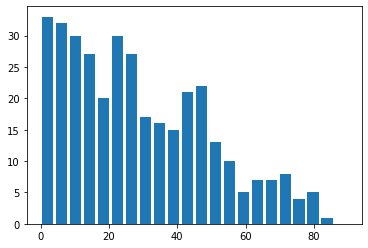

In [ ]:
print("RTA Ej 7")
plt.hist(delta_t_goles_ls, bins = int(90/4), range=[0, 90], rwidth=0.8)
plt.show()

Se ve que si meten un gol es mas probable que metan otro a los pocos minutos

EJ 8 : ¿Se parecen estas distribuciones a algunas de las que vimos en clase?

La distribucion del ejercicio 7 se parece a una distribucion geometrica.